### Import Statements

In [240]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import os
import sys
import importlib
from glob import glob
import time
from scipy.signal import find_peaks

from tabulate import tabulate

sys.path.append('/sdf/home/j/johntw/FERMI/')
import Constants as c
import RunInfo as RI
import ECalibSupportFunctions as SF
for i in [c, RI, SF]:
    importlib.reload(i)

### Load in Run Data

Important Parameters

In [175]:
electron_spectrum_length = 9000
path = (SF.get_run_path(RI.base_path, RI.beamtime, mode='Beamtime')).format
run_info = RI.load_run_info()

run = 715

glob some data

In [176]:
data = SF.load_tof(path, run, electron_spectrum_length)

Generate a spectrum and do some peak finding

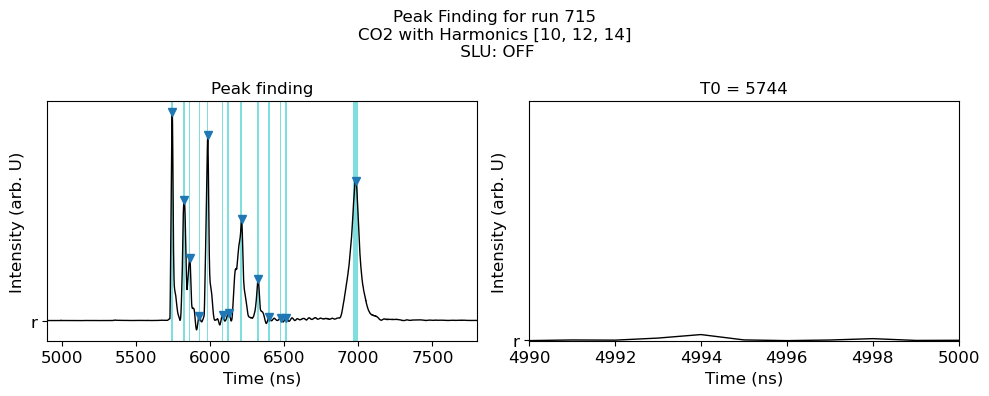

Peaks: [5744 5824 5862 5926 5984 6084 6124 6212 6324 6398 6475 6509 6983]


In [193]:
tof = np.mean(data[:,:-1],axis=0)
seed_lambda = np.mean(data[:,-1])

peaks = SF.plot_peakfound(tof, show=False)
plt.suptitle(f'Peak Finding for run {run}\n{run_info[run]["sample"]} with Harmonics {run_info[run]["harmonics"]}\n SLU: {["ON" if run_info[run]["slu"] == 1 else "OFF"][0]}')

plt.tight_layout()
plt.show()

print(f'Peaks: {peaks}')

Energies of Harmonics

In [189]:
print(SF.harmonic_energies(run_info[run]['harmonics'], seed_lambda, run_info[run]['sample'], c.IPs))

+------------------+---------------+---------------+---------------+
| State/Molecule   |  Harmonic 10  |  Harmonic 12  |  Harmonic 14  |
+==================+===============+===============+===============+
| X                |    33.1195    |    42.499     |    51.8784    |
+------------------+---------------+---------------+---------------+
| A                |    29.5835    |    38.963     |    48.3424    |
+------------------+---------------+---------------+---------------+
| B                |    28.8205    |     38.2      |    47.5794    |
+------------------+---------------+---------------+---------------+
| C                |    27.5035    |    36.883     |    46.2624    |
+------------------+---------------+---------------+---------------+


Energy Calibration (assumes you are using X state if harmonics and CO2)

Slope: 1.2192248518902497e-11
Intercept: 30.01
T0: 4994


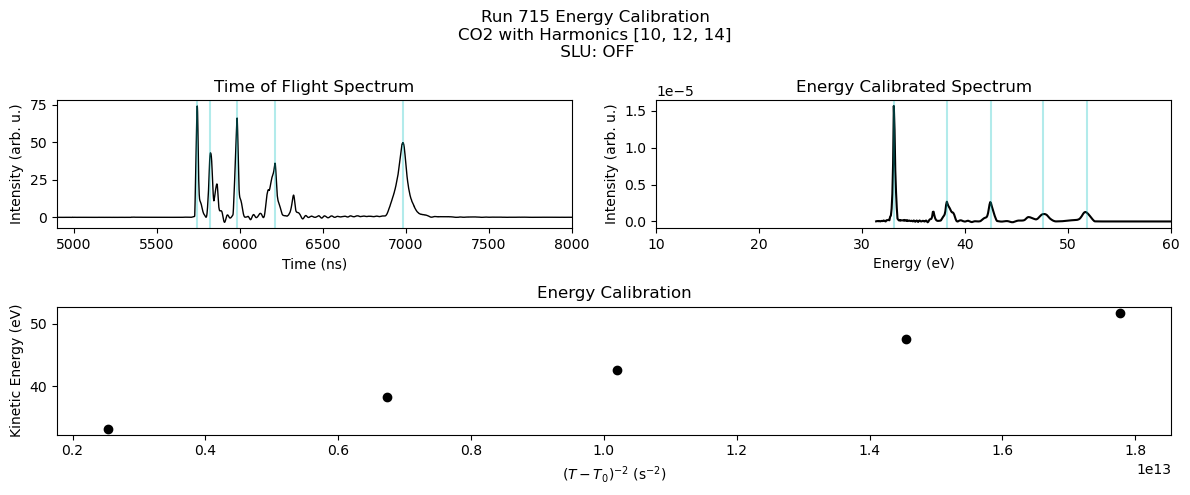

In [197]:
peaks = np.array([5744, 5823, 5984, 6212, 6983])
energies_or_harmonics = [51.8, 47.581, 42.5,38.202,33.121]

slope, intercept, e_axis, e_spec = SF.calib(tof, electron_spectrum_length, peaks, energies_or_harmonics, seed_lambda, 'energies', IP=c.IPs[run_info[run]['sample'] if run_info[run]['sample'] in ['He','Ne'] else 'X'])
plt.suptitle(f'Run {run} Energy Calibration\n{run_info[run]["sample"]} with Harmonics {run_info[run]["harmonics"]}\n SLU: {["ON" if run_info[run]["slu"] == 1 else "OFF"][0]}')
plt.tight_layout()
plt.show()

/sdf/home/j/johntw/FERMI/ECalibSupportFunctions.py:445: RuntimeWarning: invalid value encountered in sqrt
/sdf/home/j/johntw/FERMI/ECalibSupportFunctions.py:446: RuntimeWarning: invalid value encountered in sqrt
/sdf/home/j/johntw/FERMI/ECalibSupportFunctions.py:447: RuntimeWarning: invalid value encountered in sqrt


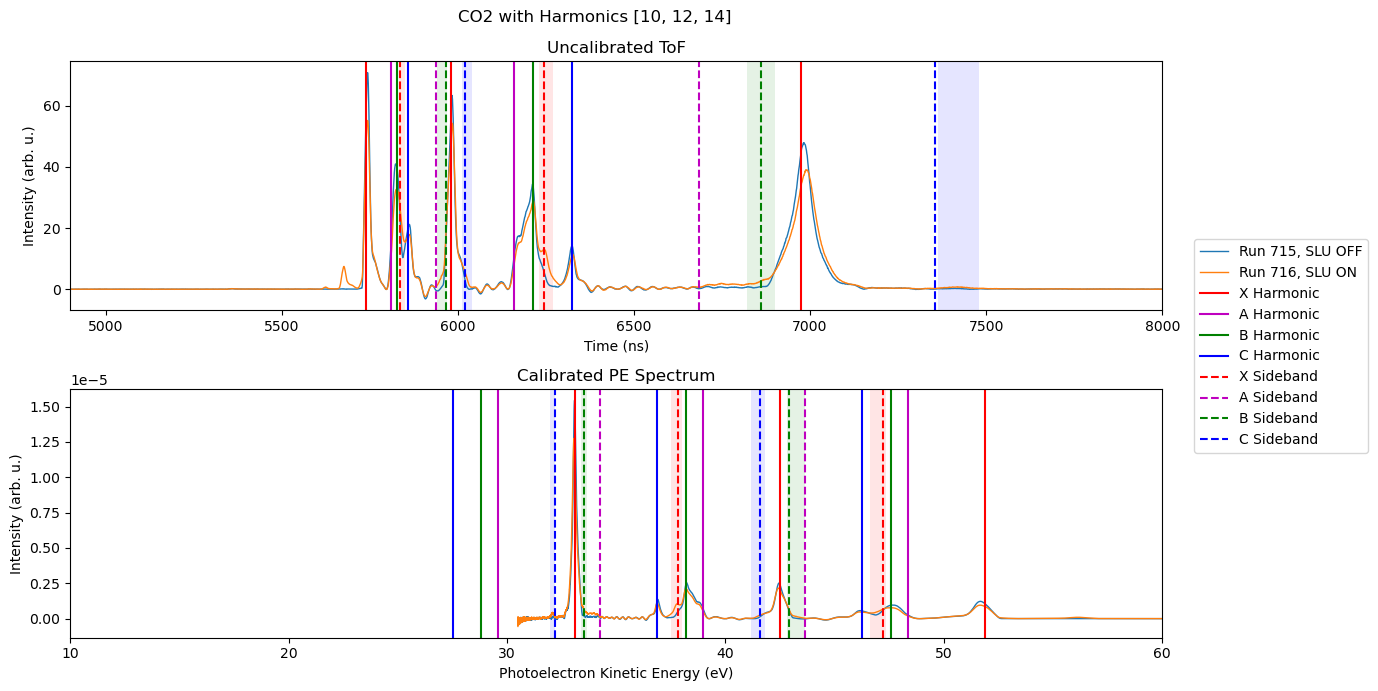

In [241]:
runs = [715, 716]
SF.full_spectra_plotting(path,
                         run_info,
                         runs,
                         electron_spectrum_length,
                         slope,
                         intercept
                        )